In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import bisect
from itertools import permutations
import colorama
from colorama import Fore
from sklearn.cluster import KMeans

1-GC Content    
2-Complement    
3-Reverse     
4-reverseComplement    
5-Translation_Table     

In [35]:
seqq="GCCTCTGGTATGCTTCCCT"
seq = "GCCTCTGGTATGCTTCCCTGCTTGATGATTGCGGAAACCGTAACCCTACAAGGCAGGACGATGCTAGAAAAAACCAAGCAGTTTGTGGAGAATGTGACTGTGGACTATTTACAAAAAATCTGCAACTAATGTTCCGTGCCTGCCGCTGCACCCAAATCCCAAGTTTAGGGTGCG"

In [36]:
def GC_Content(seqq):
    l=len(seqq)
    num_G=seqq.count("G")
    num_C=seqq.count("C")
    total=num_C+num_G
    return total/l
print(GC_Content(seqq))

0.5789473684210527


In [37]:
def Complement(seqq):
    comp = " "
    for i in seqq:
        if (i=="A"):
            comp= comp +"T"
        if (i=="T"):
            comp= comp +"A"
        if (i=="C"):
            comp= comp +"G"
        if (i=="G"):
            comp= comp +"C"
    return comp
complementSeq = Complement(seqq)
print(complementSeq)

 CGGAGACCATACGAAGGGA


In [38]:
def Reverse(seqq):
    return seqq[::-1]
print (Reverse(seqq))

TCCCTTCGTATGGTCTCCG


In [39]:
def reverseComplement(complementSeq):
    return complementSeq[::-1]
reverseComplementSeq = reverseComplement(complementSeq)
print(reverseComplementSeq)

AGGGAAGCATACCAGAGGC 


In [40]:
def Translation_Table(seq):
    dic = {"TTT" : "F", "CTT" : "L", "ATT" : "I", "GTT" : "V",
           "TTC" : "F", "CTC" : "L", "ATC" : "I", "GTC" : "V",
           "TTA" : "L", "CTA" : "L", "ATA" : "I", "GTA" : "V",
           "TTG" : "L", "CTG" : "L", "ATG" : "M", "GTG" : "V",
           "TCT" : "S", "CCT" : "P", "ACT" : "T", "GCT" : "A",
           "TCC" : "S", "CCC" : "P", "ACC" : "T", "GCC" : "A",
           "TCA" : "S", "CCA" : "P", "ACA" : "T", "GCA" : "A",
           "TCG" : "S", "CCG" : "P", "ACG" : "T", "GCG" : "A",
           "TAT" : "Y", "CAT" : "H", "AAT" : "N", "GAT" : "D",
           "TAC" : "Y", "CAC" : "H", "AAC" : "N", "GAC" : "D",
           "TAA" : "*", "CAA" : "Q", "AAA" : "K", "GAA" : "E",
           "TAG" : "*", "CAG" : "Q", "AAG" : "K", "GAG" : "E",
           "TGT" : "C", "CGT" : "R", "AGT" : "S", "GGT" : "G",
           "TGC" : "C", "CGC" : "R", "AGC" : "S", "GGC" : "G",
           "TGA" : "*", "CGA" : "R", "AGA" : "R", "GGA" : "G",
           "TGG" : "W", "CGG" : "R", "AGG" : "R", "GGG" : "G" 
           }
    s=""
    sf=""
    flag=0
    for i in range(0,len(seq)-2,3):
        if dic[seq[i:i+3]]=="M":
            flag=1
        elif (dic[seq[i:i+3]]=="*"):
            flag=0
        if flag==1:
            s+=dic[seq[i:i+3]]
        sf+=dic[seq[i:i+3]]
    return sf,s   
s="GCCTCTGGTATGCTTCCCTGCTTGATGATTGCGGAAACCGTAACCCTACAAG"
print(Translation_Table(s))

('ASGMLPCLMIAETVTLQ', 'MLPCLMIAETVTLQ')


In [41]:
def translation(seq):
    dic = {"TTT" : "F", "CTT" : "L", "ATT" : "I", "GTT" : "V",
           "TTC" : "F", "CTC" : "L", "ATC" : "I", "GTC" : "V",
           "TTA" : "L", "CTA" : "L", "ATA" : "I", "GTA" : "V",
           "TTG" : "L", "CTG" : "L", "ATG" : "M", "GTG" : "V",
           "TCT" : "S", "CCT" : "P", "ACT" : "T", "GCT" : "A",
           "TCC" : "S", "CCC" : "P", "ACC" : "T", "GCC" : "A",
           "TCA" : "S", "CCA" : "P", "ACA" : "T", "GCA" : "A",
           "TCG" : "S", "CCG" : "P", "ACG" : "T", "GCG" : "A",
           "TAT" : "Y", "CAT" : "H", "AAT" : "N", "GAT" : "D",
           "TAC" : "Y", "CAC" : "H", "AAC" : "N", "GAC" : "D",
           "TAA" : "*", "CAA" : "Q", "AAA" : "K", "GAA" : "E",
           "TAG" : "*", "CAG" : "Q", "AAG" : "K", "GAG" : "E",
           "TGT" : "C", "CGT" : "R", "AGT" : "S", "GGT" : "G",
           "TGC" : "C", "CGC" : "R", "AGC" : "S", "GGC" : "G",
           "TGA" : "*", "CGA" : "R", "AGA" : "R", "GGA" : "G",
           "TGG" : "W", "CGG" : "R", "AGG" : "R", "GGG" : "G" 
           }
    x = ''
    for i in range(0,len(seq),3):
        if dic[seq[i:i+3]]!="*":
            x = x + dic[seq[i:i+3]]
    return x
print(translation(seq))

ASGMLPCLMIAETVTLQGRTMLEKTKQFVENVTVDYLQKICNCSVPAAAPKSQVGA


1-Matching          
2-Bad Characters


In [42]:
seq1="ACGTTCGAC"
sub_seq= "ACGTTCGAC"

In [43]:
def match(seq1,sub_seq):
    x=-1
    for i in range(len(seq1)-len(sub_seq)+1):
        if sub_seq==seq1[i:i+len(sub_seq)]:
            x=i
    return x
print(match(seq1,sub_seq))

0


In [44]:
def Badchars(seq1,sub_seq):
    table=np.zeros([4,len(sub_seq)])     
    row=["C","G","A","T"]
    for i in range (4):
        num=-1
        for j in range (len(sub_seq)):
            if row[i]==sub_seq[j]:
                table[i,j]=-1
                num=-1
            else:
                num+=1
                table[i,j]=num
    x=-1
    i=0
    while(i<len(seq1)-len(sub_seq)+1):
        if sub_seq==seq1[i:i+len(sub_seq)]:
            x=i
        else:
            for j in range(i+len(sub_seq)-1,i-1,-1):
                if seq1[j] != sub_seq[int(j-i)]:
                    k=row.index(seq[j])
                    i+=table[k,j-i]
                    break
        i=int(i+1)
    return x
print(Badchars(seq1,sub_seq))

0


Index Sorted

In [45]:
seq="GCAGGGGGCGGAAACTTGGAGGCACCCAGGAATTTCACCCGGGTCGACCTGGGCGGCTAGGAGCCGT"
ln=3

In [46]:
def IndexSorted(seq,ln):
    index = []
    for i in range(len(seq)-ln+1):
        index.append((seq[i:i+ln], i))
    index.sort() 
    return index
print(IndexSorted(seq,ln))

[('AAA', 11), ('AAC', 12), ('AAT', 30), ('ACC', 23), ('ACC', 36), ('ACC', 46), ('ACT', 13), ('AGC', 61), ('AGG', 2), ('AGG', 19), ('AGG', 27), ('AGG', 58), ('ATT', 31), ('CAC', 22), ('CAC', 35), ('CAG', 1), ('CAG', 26), ('CCA', 25), ('CCC', 24), ('CCC', 37), ('CCG', 38), ('CCG', 63), ('CCT', 47), ('CGA', 44), ('CGG', 8), ('CGG', 39), ('CGG', 53), ('CGT', 64), ('CTA', 56), ('CTG', 48), ('CTT', 14), ('GAA', 10), ('GAA', 29), ('GAC', 45), ('GAG', 18), ('GAG', 60), ('GCA', 0), ('GCA', 21), ('GCC', 62), ('GCG', 7), ('GCG', 52), ('GCT', 55), ('GGA', 9), ('GGA', 17), ('GGA', 28), ('GGA', 59), ('GGC', 6), ('GGC', 20), ('GGC', 51), ('GGC', 54), ('GGG', 3), ('GGG', 4), ('GGG', 5), ('GGG', 40), ('GGG', 50), ('GGT', 41), ('GTC', 42), ('TAG', 57), ('TCA', 34), ('TCG', 43), ('TGG', 16), ('TGG', 49), ('TTC', 33), ('TTG', 15), ('TTT', 32)]


In [47]:
t=seq[1][0:-1]
p="GCA"
def query(t,p,index):
    keys = [r[0] for r in index]
    st = bisect.bisect_left(keys,p[:len(keys[0])])
    
    en = bisect.bisect(keys,p[:len(keys[0])])
    hits = index[st:en] 
    print(hits)
    l=[h[1] for h in hits ]
    offsets=[]
    for i in l:
        if t[i:i+len(p)]==p:
            offsets.append(i)
    return offsets
index=IndexSorted(seq,ln)
print(query(t,p,index))

[('GCA', 0), ('GCA', 21)]
[]


OverLap


In [48]:
def overlap(a,b,min_length=3):
    start=0
    while True:
        start=a.find(b[:min_length],start)
        if start==-1:
            return 0
        if b.startswith(a[start:]):
            return len(a[start:])
        start+=1
    print(overlap(a,b,min_length=3))


In [49]:
a="ACGGTA" 
b="GTAGTA"
min_len=3
j=len(a)-1
count=0
for i in range(len(b)-1,-1,-1):
    if a[j]==b[i]:
        count+=1
        j-=1
    else:
        count=0
        j=len(a)-1
        if a[j]==b[i]:
            count+=1
            j-=1
if count>=min_len:
    print('overlap:',count)
else:
    print("no overlap")

overlap: 3


Constraction OF suffix by Character Method


In [50]:
T = 'ACGACTACGATAAC$'
l=[]
for i in range(len(T)):
    l.append(T[i:])
l2=l.copy()
l.sort()
dec={}
for i in range(len(l)):
    dec[l[i]]=i
table=[]
for i in range(len(l)):
    table.append([l2[i],i,dec[l2[i]]])
print(table)

[['ACGACTACGATAAC$', 0, 3], ['CGACTACGATAAC$', 1, 8], ['GACTACGATAAC$', 2, 11], ['ACTACGATAAC$', 3, 5], ['CTACGATAAC$', 4, 10], ['TACGATAAC$', 5, 14], ['ACGATAAC$', 6, 4], ['CGATAAC$', 7, 9], ['GATAAC$', 8, 12], ['ATAAC$', 9, 6], ['TAAC$', 10, 13], ['AAC$', 11, 1], ['AC$', 12, 2], ['C$', 13, 7], ['$', 14, 0]]


Distance Between Two Seq

In [51]:
seq="ATGTGTG"
tag=3
dic={}
for i in range(0,len(seq)-tag):
    dic[seq[i:i+tag]]=dic.get(seq[i:i+tag],0)+1

In [52]:
seq2="CATGTG"
dic2={}
for i in range(0,len(seq2)-tag):
    dic2[seq2[i:i+tag]]=dic2.get(seq2[i:i+tag],0)+1

In [53]:
k=list(dic.keys())
for i in range(len(k)):
    dic2[k[i]]=(dic2.get(k[i],0)-dic[k[i]])
d=list(dic2.values())
Sum=0
for i in range(len(d)):
    Sum+=d[i]**2
distance=Sum**(0.5)
print("distance between two dna sequences = ",distance)

distance between two dna sequences =  1.7320508075688772


Bouns Code

#1 fibonacci 

In [54]:
FibArray = [0, 1]
def fibonacci(n):
   
    # Check is n is less
    # than 0
    if n < 0:
        print("Incorrect input")
         
    # Check is n is less
    # than len(FibArray)
    elif n < len(FibArray):
        return FibArray[n]
    else:       
        FibArray.append(fibonacci(n - 1) + fibonacci(n - 2))
        return FibArray[n]

number=8
fibonacci_result = fibonacci(number)
print(fibonacci_result)

21


#2 LCS 

In [55]:
#2 LCS
def lcs(X, Y, m, n):
    L = [[0 for i in range(n+1)] for j in range(m+1)]
 
    # Following steps build L[m+1][n+1] in bottom up fashion. Note
    # that L[i][j] contains length of LCS of X[0..i-1] and Y[0..j-1]
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1] + 1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])
 
        # Create a string variable to store the lcs string
    lcs = ""
 
    # Start from the right-most-bottom-most corner and
    # one by one store characters in lcs[]
    i = m
    j = n
    while i > 0 and j > 0:
 
        # If current character in X[] and Y are same, then
        # current character is part of LCS
        if X[i-1] == Y[j-1]:
            lcs += X[i-1]
            i -= 1
            j -= 1
 
        # If not same, then find the larger of two and
        # go in the direction of larger value
        elif L[i-1][j] > L[i][j-1]:
            i -= 1
             
        else:
            j -= 1
 
    # We traversed the table in reverse order
    # LCS is the reverse of what we got
    lcs = lcs[::-1]
    print("LCS of " + X + " and " + Y + " is " + lcs)
 
 
# testing code
seq1 = "president"
seq2= "providence"
seq1_lenght = len(seq1)
seq2_lenght = len(seq2)
#calling function
lcs(seq1, seq2,seq1_lenght , seq2_lenght)

LCS of president and providence is priden


#3 Kmean 

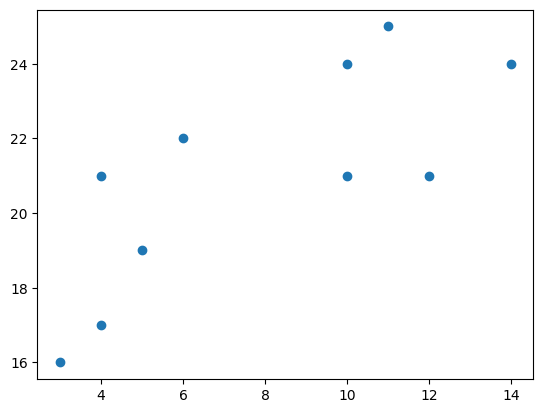

In [56]:
#The data Before Clustring 
# Here we would enter  three thing the two data list or csv file and num of clusters
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
n_clusters=2
plt.scatter(x, y)
plt.show()

Data: [(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


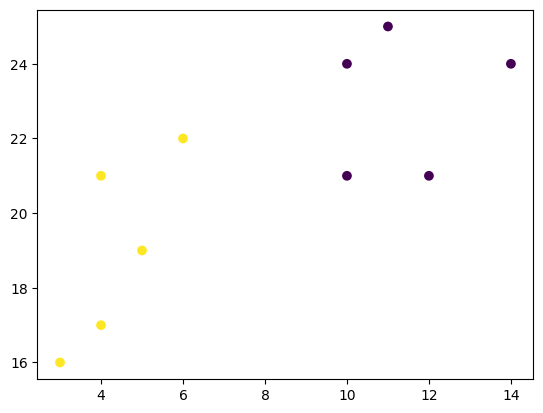

In [57]:
data = list(zip(x, y))
print('Data:',data)

kmeans = KMeans(n_clusters)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

#4 Good Suffix


In [58]:
# Python program for Boyer Moore Algorithm with 
# Good Suffix heuristic to find pattern in given text string
  
# preprocessing for strong good suffix rule
def preprocess_strong_suffix(shift, bpos, pat, m):
  
    # m is the length of pattern
    i = m
    j = m + 1
    bpos[i] = j
  
    while i > 0:
          
        '''if character at position i-1 is 
        not equivalent to character at j-1, 
        then continue searching to right 
        of the pattern for border '''
        while j <= m and pat[i - 1] != pat[j - 1]:
              
            ''' the character preceding the occurrence 
            of t in pattern P is different than the 
            mismatching character in P, we stop skipping
            the occurrences and shift the pattern 
            from i to j '''
            if shift[j] == 0:
                shift[j] = j - i
  
            # Update the position of next border
            j = bpos[j]
              
        ''' p[i-1] matched with p[j-1], border is found. 
        store the beginning position of border '''
        i -= 1
        j -= 1
        bpos[i] = j

# Preprocessing for case 2
def preprocess_case2(shift, bpos, pat, m):
    j = bpos[0]
    for i in range(m + 1):
          
        ''' set the border position of the first character 
        of the pattern to all indices in array shift
        having shift[i] = 0 '''
        if shift[i] == 0:
            shift[i] = j
              
        ''' suffix becomes shorter than bpos[0], 
        use the position of next widest border
        as value of j '''
        if i == j:
            j = bpos[j]


#Search for a pattern in given text using 
#Boyer Moore algorithm with Good suffix rule 
def search(text, pat):
  
    # s is shift of the pattern with respect to text
    s = 0
    m = len(pat)
    n = len(text)
  
    bpos = [0] * (m + 1)
  
    # initialize all occurrence of shift to 0
    shift = [0] * (m + 1)
  
    # do preprocessing
    preprocess_strong_suffix(shift, bpos, pat, m)
    preprocess_case2(shift, bpos, pat, m)
  
    while s <= n - m:
        j = m - 1
          
        ''' Keep reducing index j of pattern while characters of 
            pattern and text are matching at this shift s'''
        while j >= 0 and pat[j] == text[s + j]:
            j -= 1
              
        ''' If the pattern is present at the current shift, 
            then index j will become -1 after the above loop '''
        if j < 0:
            print("pattern occurs at shift = %d" % s)
            s += shift[0]
        else:
              
            '''pat[i] != pat[s+j] so shift the pattern 
            shift[j+1] times '''
            s += shift[j + 1]


#testing code
text = "CGTGCCTACTTACTTACTTACTTACGCGAA" 
pattren = "CTTACTTAC"
#calling function
search(text, pattren)

pattern occurs at shift = 8
pattern occurs at shift = 12
pattern occurs at shift = 16
